<a href="https://colab.research.google.com/github/havaledar/ECON3740/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wooldridge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import pandas_datareader as pdr
import datetime as dt
import seaborn as sns

import statsmodels.formula.api as smf
import wooldridge

# Regression plots

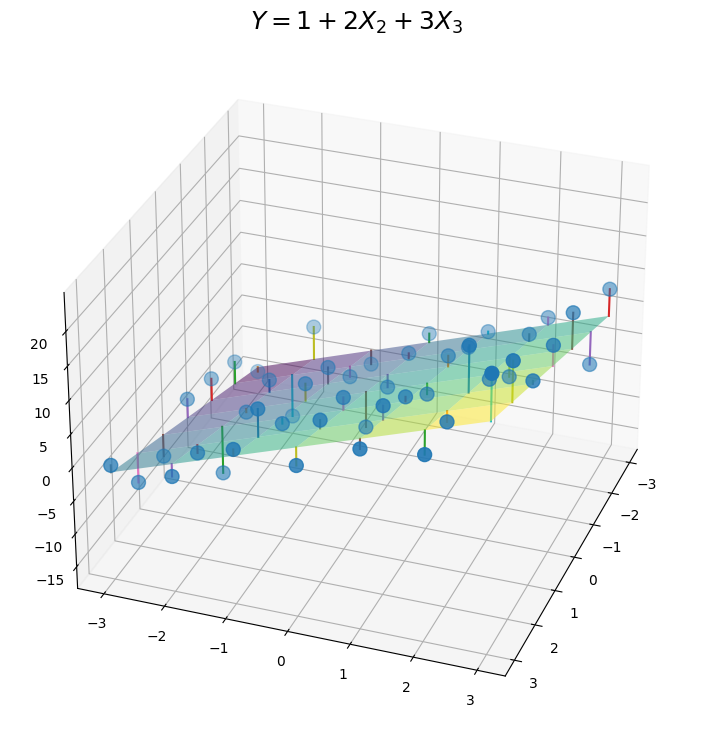

In [2]:
x2, x3 = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X2, X3 = np.meshgrid(x2, x3) # this is coordinates on X2-X3 plane
u = np.random.randn(7, 7)*3
Y = 1 + 2*X2 + 3*X3 # plane without disturbance term
Yu = 1 + 2*X2 + 3*X3 + u # with disturbance term

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('$Y=1+2X_2+3X_3$', size = 18)
ax.view_init(elev=30, azim=20)
ax.plot_surface(X2, X3, Y, cmap ='viridis', alpha=.5) # MATLAB default color map
ax.scatter(X2, X3, Yu, s = 100)

for i in range(len(X2.flatten())):
    ax.plot([X2.flatten()[i],X2.flatten()[i]], [X3.flatten()[i],X3.flatten()[i]], [Y.flatten()[i], Yu.flatten()[i]])
plt.show()

In [3]:
wage = wooldridge.data('wage2')

In [21]:
x2 = wage['educ'][:50].values
x3 = wage['exper'][:50].values
X2, X3 = np.meshgrid(x2, x3)

In [39]:
model = smf.ols(formula='wage ~ educ + exper', data=wage[:50])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.697
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.194
Time:                        23:39:33   Log-Likelihood:                -371.85
No. Observations:                  50   AIC:                             749.7
Df Residuals:                      47   BIC:                             755.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.6605    600.645      0.224      0.8

In [22]:
u = np.random.randn(len(X2), len(X3))*300

In [40]:
Y = 134.6605 + 55.5514*X2 + 14.9509*X3

In [41]:
Yu = Y + u

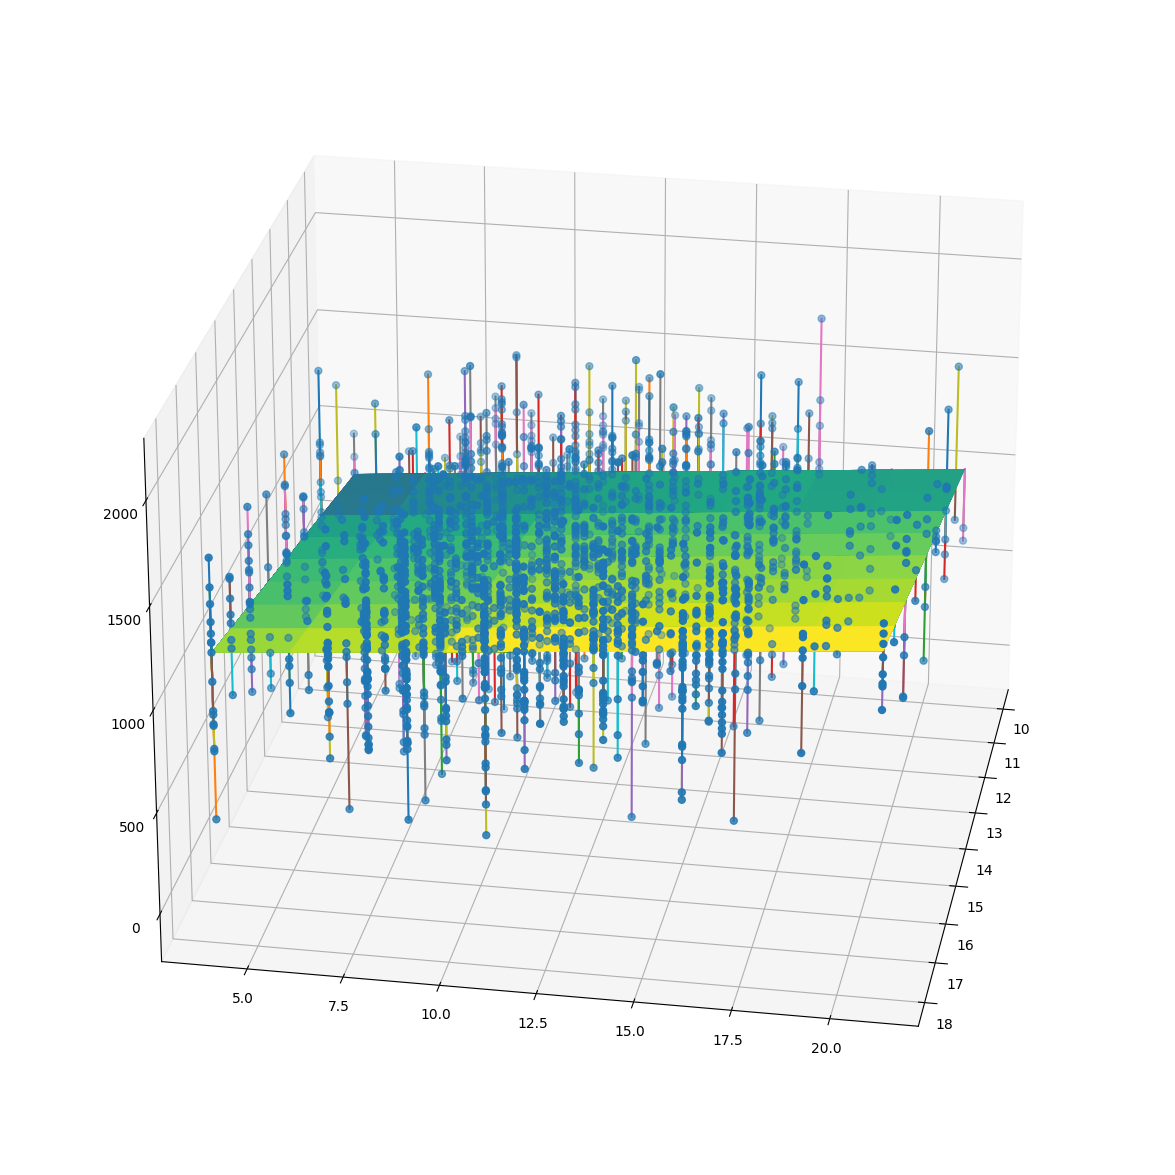

In [42]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.view_init(elev=25, azim=10)
ax.plot_surface(X2, X3, Y, cmap ='viridis', alpha=.5)
ax.scatter(X2, X3, Yu, s = 25)

for i in range(len(X2.flatten())):
    ax.plot([X2.flatten()[i],X2.flatten()[i]], [X3.flatten()[i],X3.flatten()[i]], [Y.flatten()[i], Yu.flatten()[i]])
plt.show()

# Correlation Matrix

In [3]:
n = 1000
x1 = np.random.randn(n)
x2 = np.random.rand(n)
x3 = sp.stats.t.rvs(100, loc=0, scale=1, size=n)
x4 = x2*x1-x3
x5 = x2/x3
x6 = np.log(x2)

In [4]:
df = pd.DataFrame([x1, x2, x3, x4, x5, x6]).T
df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
df.corr()

,x1,x2,x3,x4,x5,x6
x1,1.000000,-0.023138,-0.003412,0.425630,0.028602,-0.023609
x2,-0.023138,1.000000,-0.010173,-0.003689,0.017031,0.865639
x3,-0.003412,-0.010173,1.000000,-0.873099,0.006249,-0.039786
x4,0.425630,-0.003689,-0.873099,1.000000,0.011210,0.032269
x5,0.028602,0.017031,0.006249,0.011210,1.000000,0.016817
x6,-0.023609,0.865639,-0.039786,0.032269,0.016817,1.000000


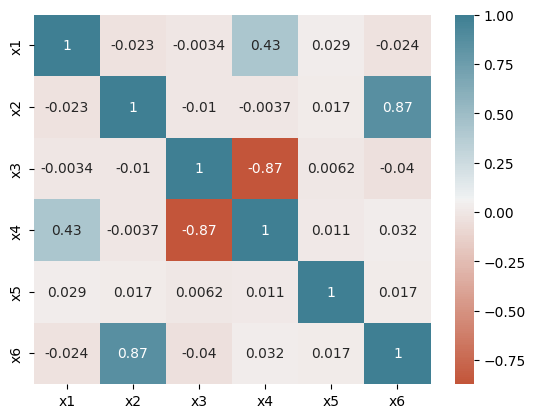

In [5]:
sns.heatmap(df.corr(),
            annot = True,
            cmap=sns.diverging_palette(20, 220, n=200)); plt.show()

# Scatter plots

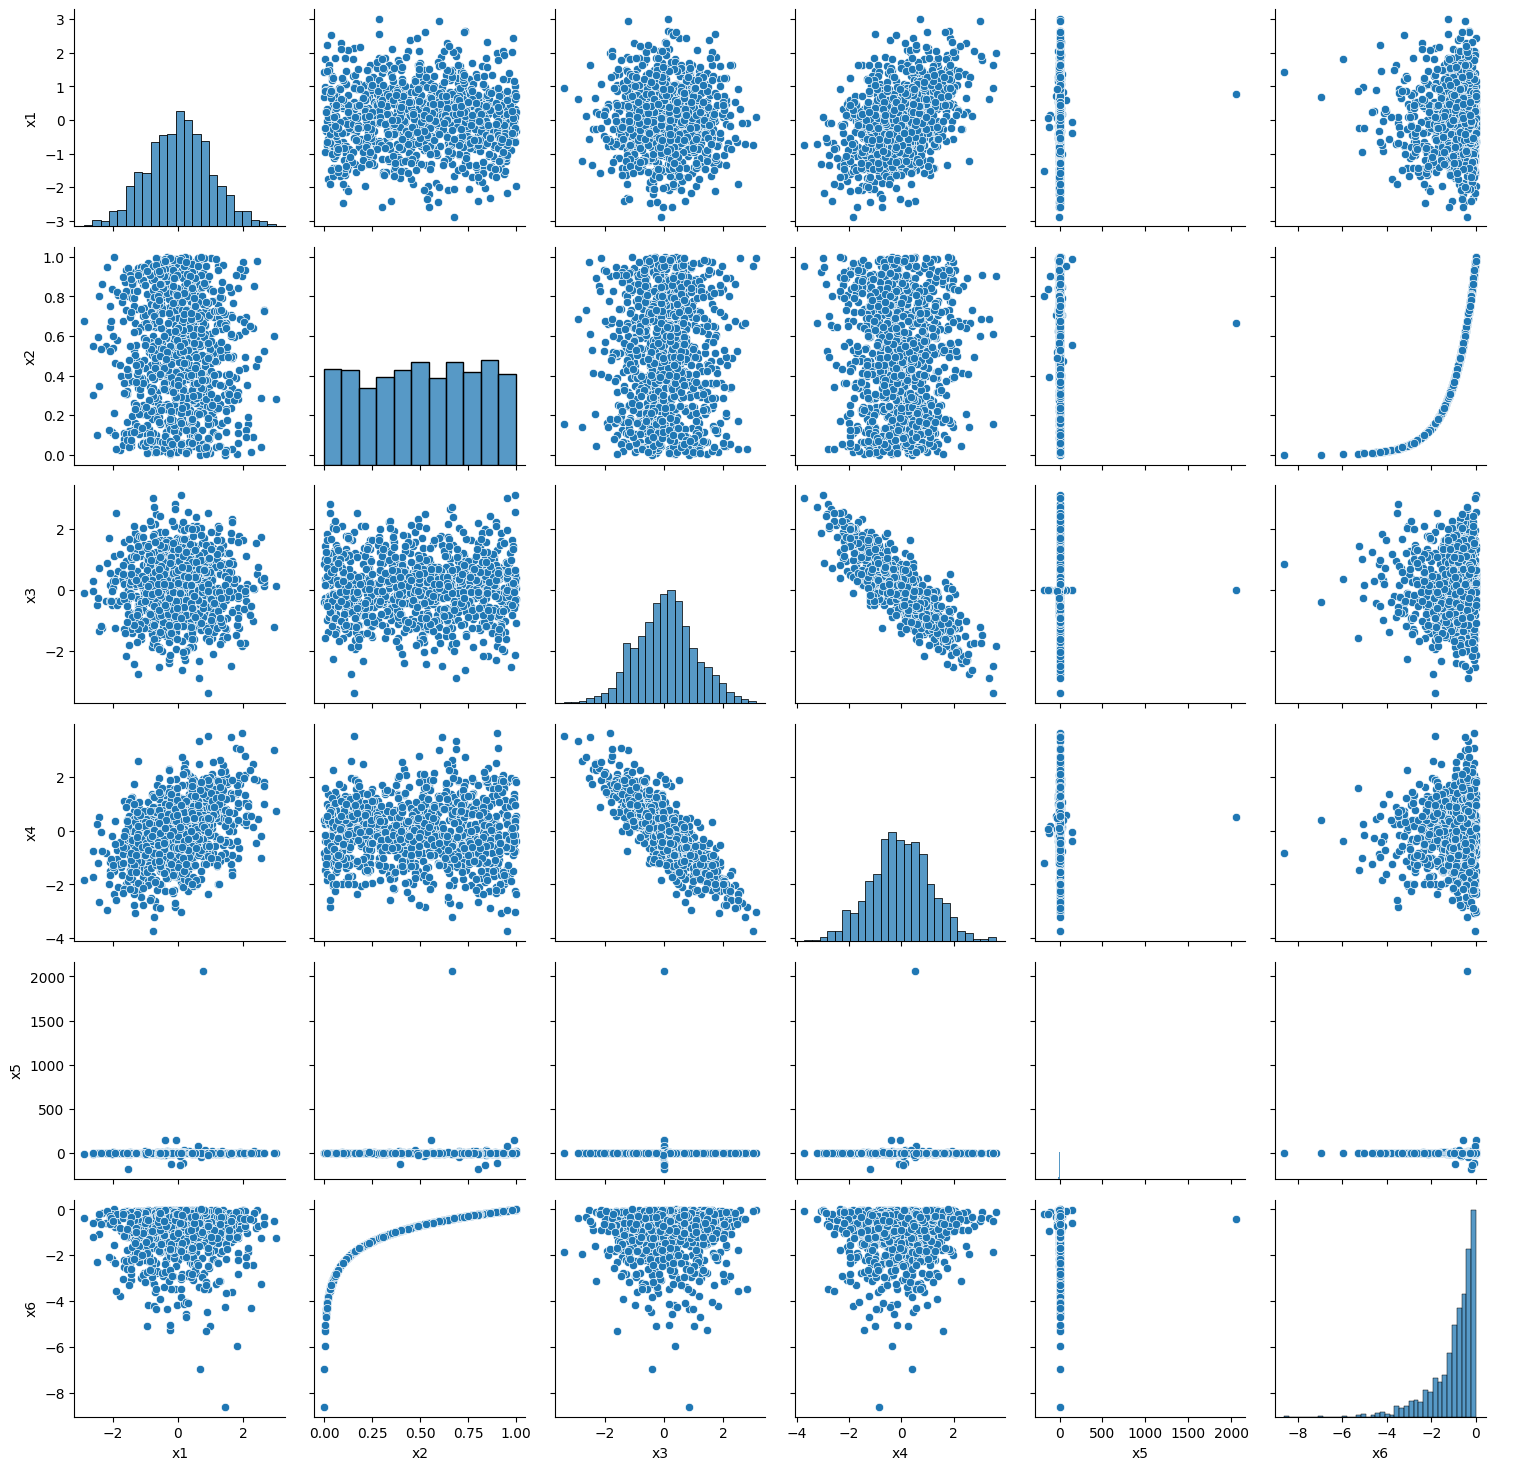

In [6]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

In [60]:
wage = wooldridge.data('wage2')

In [49]:
wage_4 = wage[['wage', 'educ', 'exper', 'tenure']]

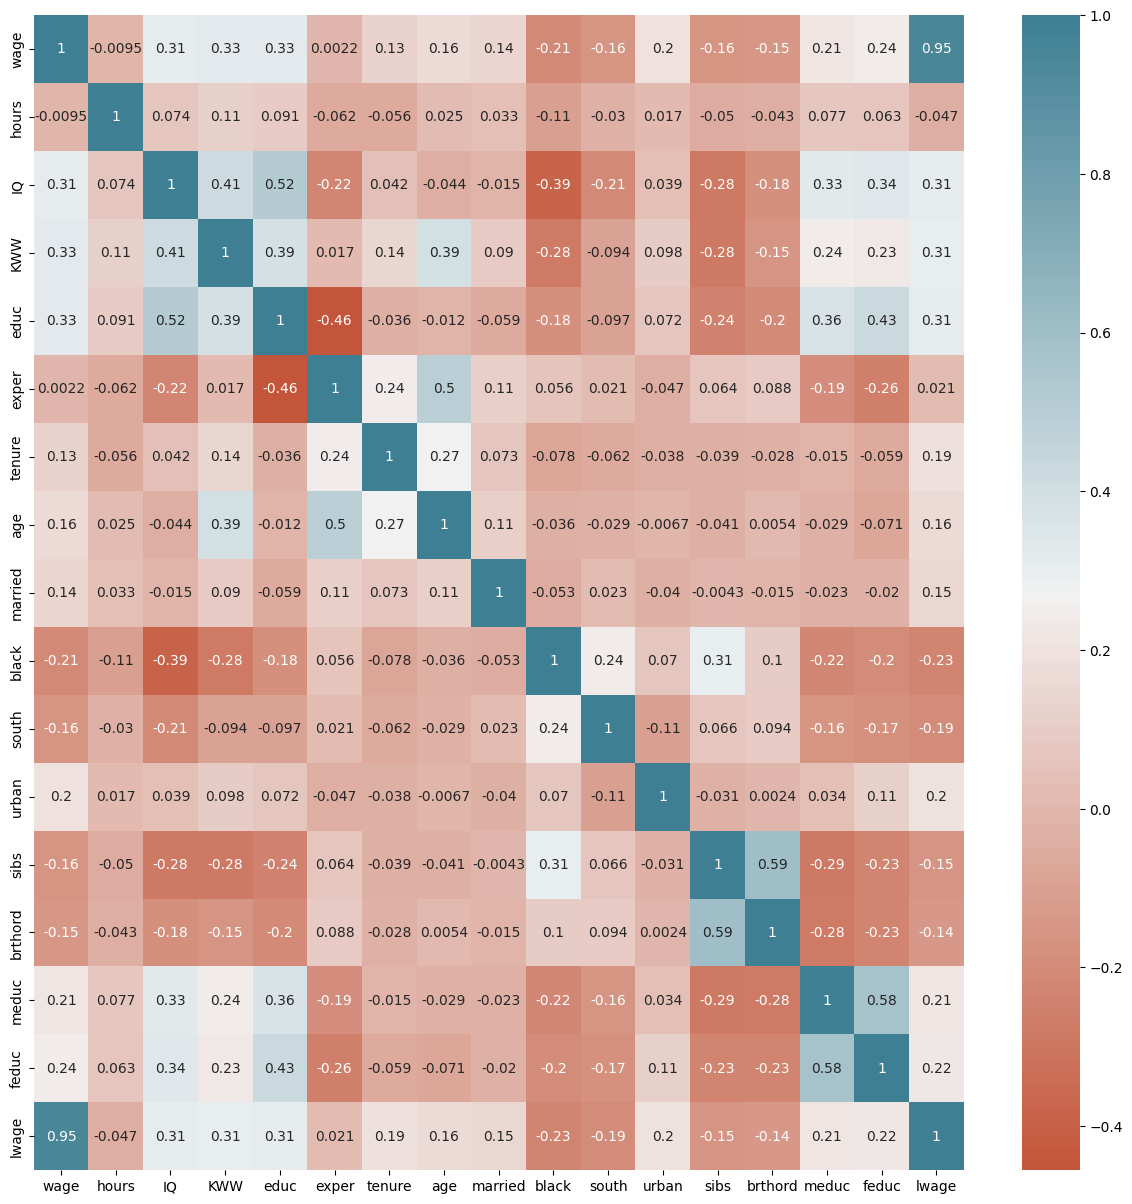

In [73]:
plt.figure(figsize=(15, 15))
sns.heatmap(wage.corr(),
            annot = True,
            cmap=sns.diverging_palette(20, 220, n=200)); plt.show()

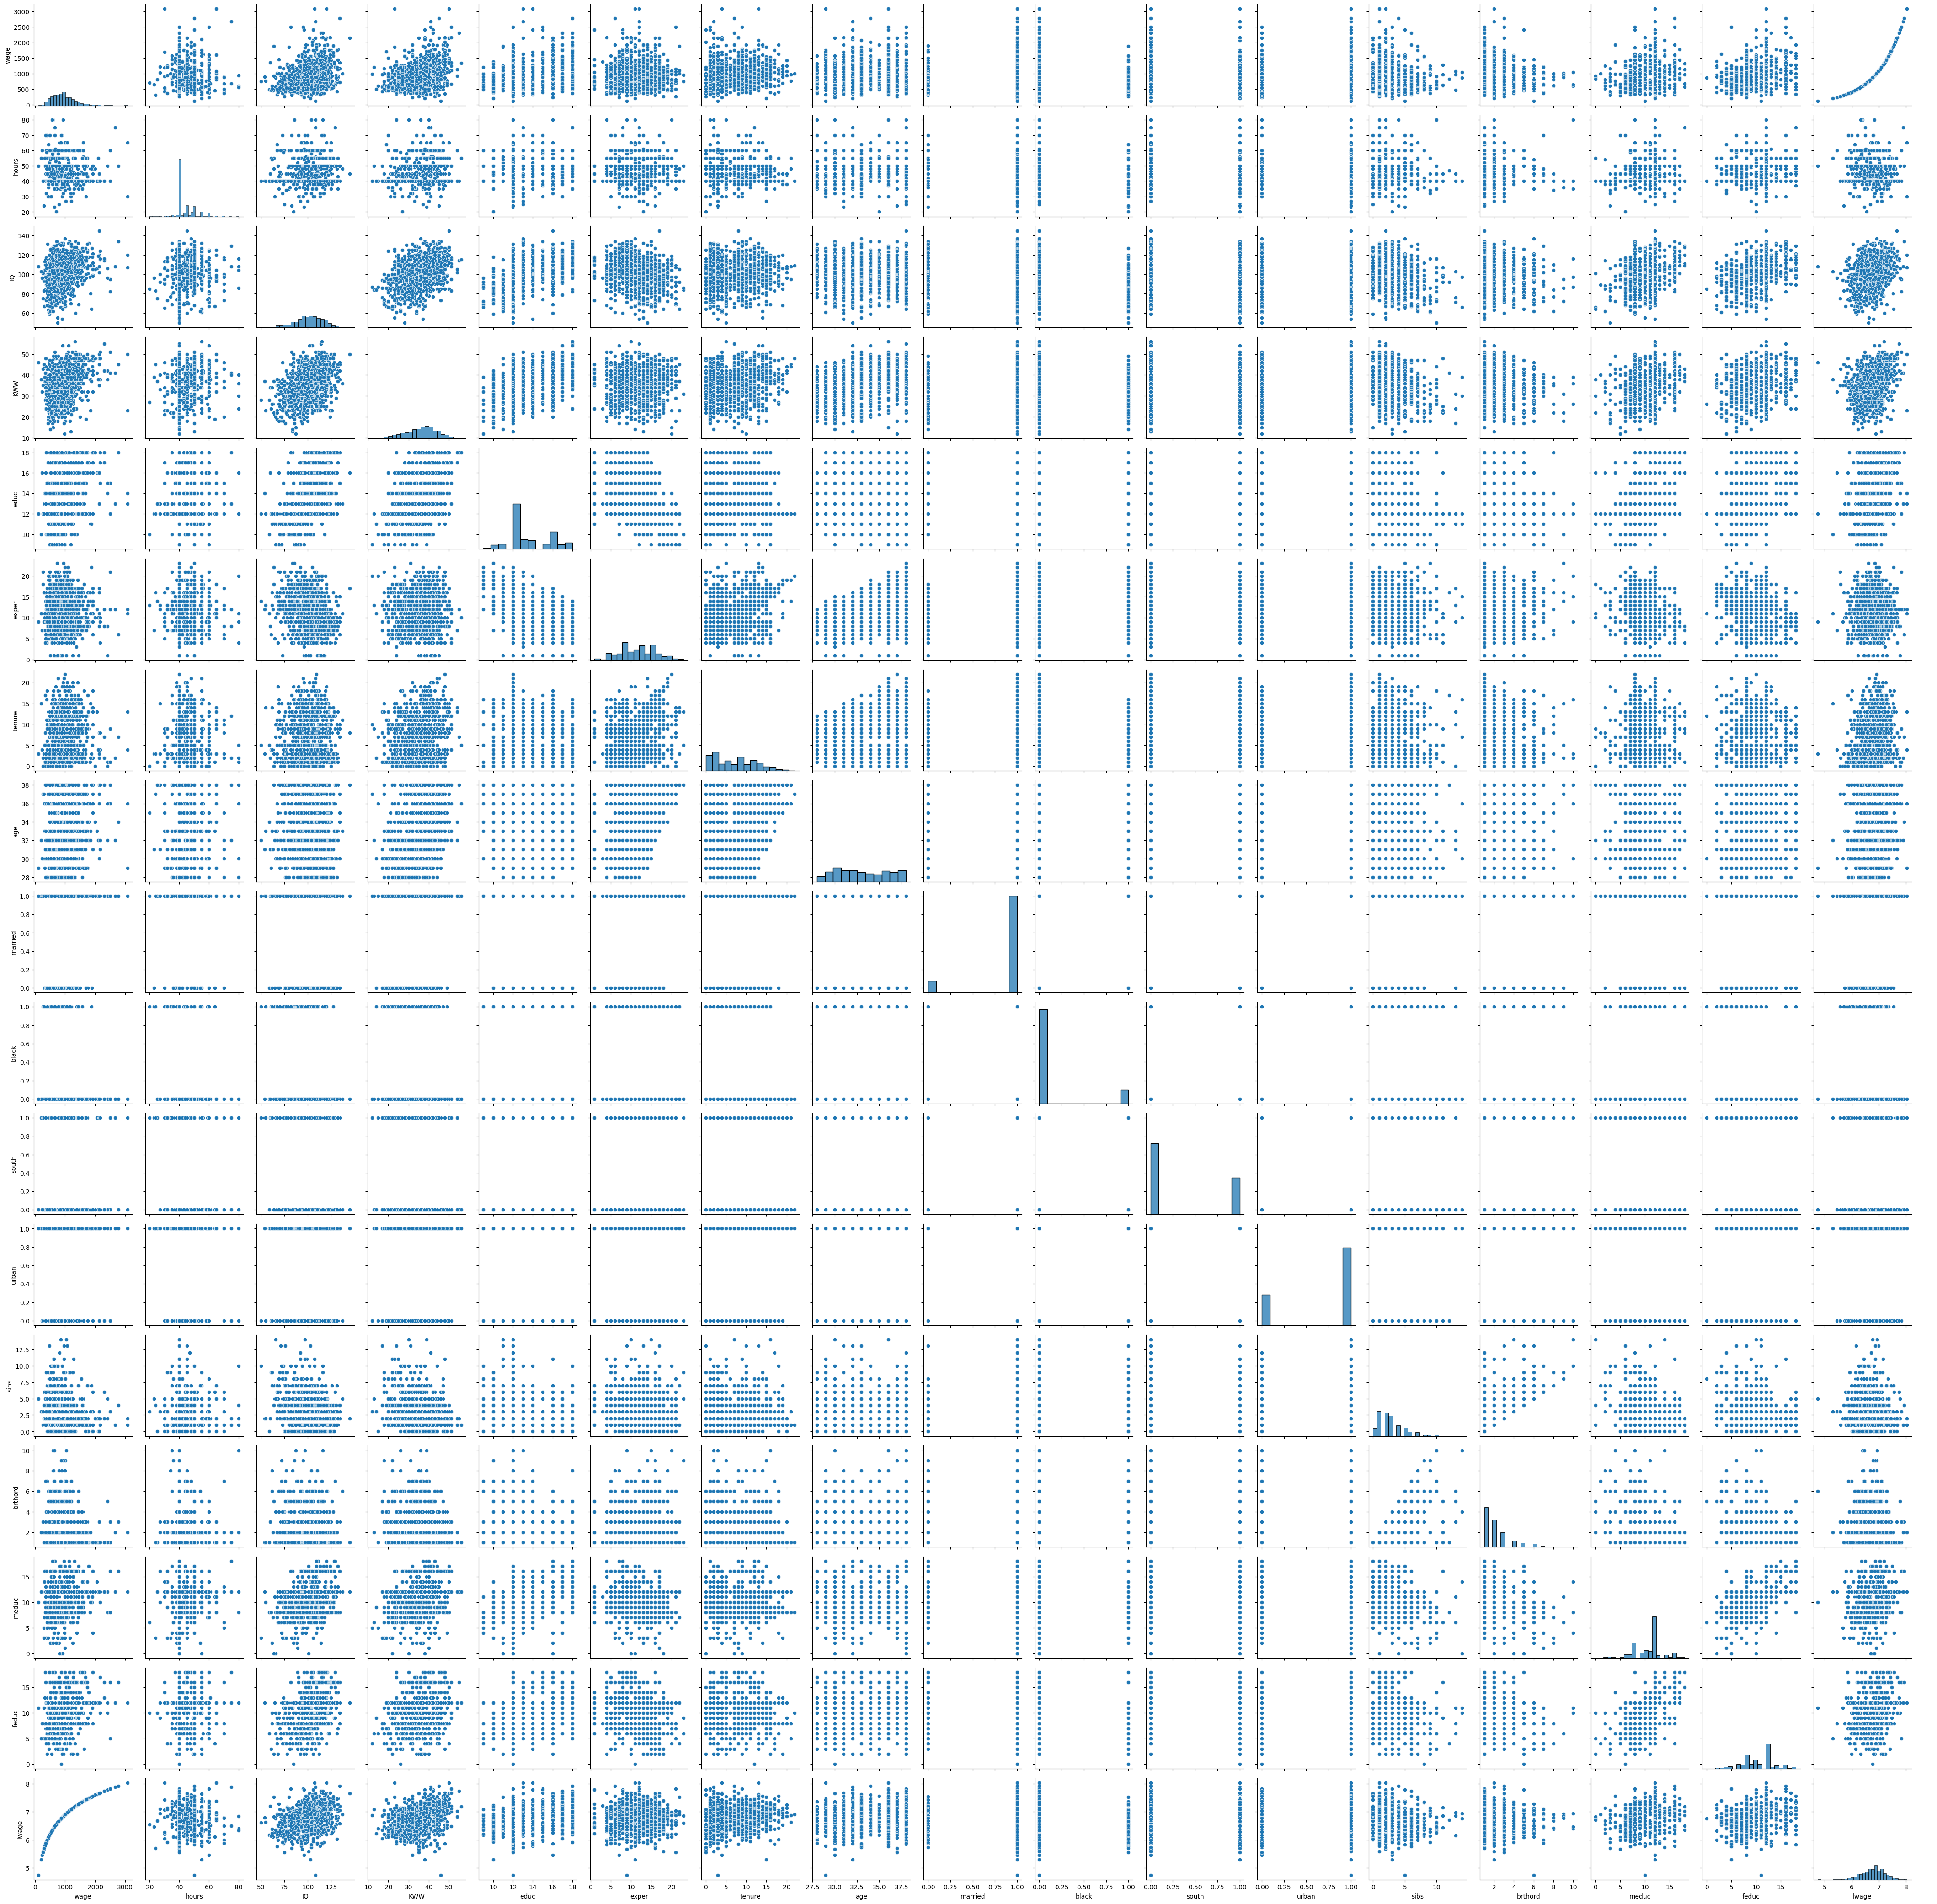

In [74]:
g = sns.PairGrid(wage)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()